## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

*Adaptado do exemplo A-6-19 do livro*: 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}
com:
\begin{align*}
    & N(s) = (s+a) \\
    & D(s) = s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)
\end{align*}

O sistema tem um polo de malha aberta no semi-plano direito e, provavelmente, deve ser apenas *condicionalmente estável*.

Adote-se $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

Neste caso, o sistema é do tipo 1, tendo um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.


In [1]:
# !pip install matplotlib ipympl jupyter

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import sympy as sp
import control as ct
from tbcontrol.symbolic import routh

s = ct.tf([1, 0], [1])

In [3]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Função de transferência de malha aberta

In [90]:


L_0 = ct.tf([0,0,37.2428000000000,44.1077252817023,199.004232783142,56.5658583247018,49.9538633901049],[1,1.19999999999997,6.06999999999997,-2.30399999999996,-3.20259999999930,-2.76339999999981,0])/37.2428000000000
L_0

TransferFunction(array([ 37.2428    ,  44.10772528, 199.00423278,  56.56585832,
        49.95386339]), array([  37.2428    ,   44.69136   ,  226.063796  ,  -85.8074112 ,
       -119.27379128, -102.91675352,    0.        ]))

### 2. Determinação dos ganhos críticos via tabela de Routh

In [91]:
s_s = sp.symbols('s')
N_s = sp.Poly(np.poly(ct.zeros(L_0)), s_s)
D_s = sp.Poly(np.poly(ct.poles(L_0)), s_s)
N_s/D_s
N = ct.tf(np.poly(ct.zeros(L_0)),[1])
D = ct.tf(np.poly(ct.poles(L_0)),[1])


In [92]:
K_c = sp.symbols('K_c')
B_s = K_c * N_s + D_s

table_B = routh(B_s)
table_B

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       1.0,                                                                                   

De fato, a planta é *condicionalmente estável*, ou seja, é possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K_c$) se, e somente se: $$K_c < 0.90337226204908848270845329711761$$

### 3. Síntese de um controlador PID via lugar das raízes

#### 3.1. Síntese de um compensador proporcional 

Lugar das raízes de $L(s)$

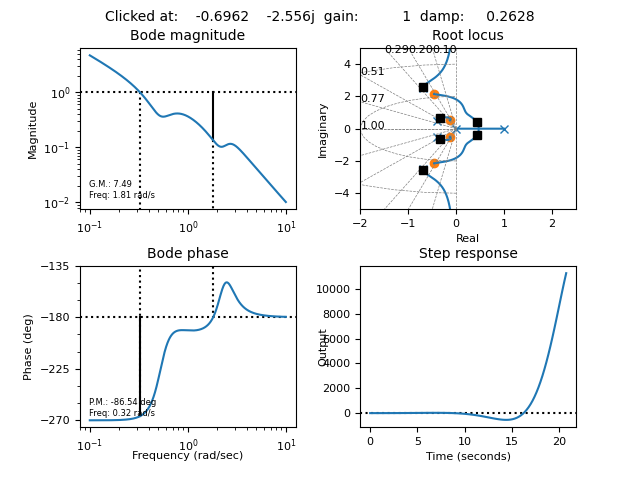

Clicked at    -0.2962    +2.087j gain      18.41 damp     0.1405
Clicked at    -0.2015     +2.01j gain      12.42 damp    0.09972
Clicked at    -0.1652     +2.01j gain      11.56 damp    0.08189
Clicked at   -0.05874    +1.903j gain      8.775 damp    0.03086
Clicked at    -0.0152    +1.849j gain       7.91 damp   0.008221
Clicked at   -0.03214    +1.849j gain      8.023 damp    0.01738
Clicked at   -0.01036    +1.849j gain      7.878 damp   0.005605
Clicked at   0.001731    +1.836j gain      7.681 damp -0.0009433
Clicked at    0.02108    +1.755j gain      6.885 damp   -0.01201
Clicked at  -0.005526    +1.795j gain      7.359 damp   0.003078
Clicked at   -0.02004    +1.862j gain      8.068 damp    0.01076
Clicked at   -0.01932    +1.844j gain       7.89 damp    0.01048
Clicked at   -0.01189    +1.839j gain      7.799 damp   0.006462
Clicked at   -0.02161    +1.839j gain      7.861 damp    0.01175
Clicked at   -0.07481    +1.919j gain      9.097 damp    0.03897
Clicked at  -0.005592    

c:\Users\lucap\AppData\Local\Programs\Python\Python39\lib\site-packages\control\timeresp.py:1054: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
c:\Users\lucap\AppData\Local\Programs\Python\Python39\lib\site-packages\control\timeresp.py:1054: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]


Clicked at    -0.1436    +3.125j gain      6.562 damp    0.04589
Clicked at    -0.1436    +3.125j gain      6.562 damp    0.04589
Clicked at    -0.3649    +3.325j gain      9.619 damp     0.1091


In [116]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-2, 2.5), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

A partir do lugar das raízes $L(s)$, pode-se escolher como valor inicial para o ganho proporcional $K_p = 11$.

#### 3.2. Síntese de um compensador PI

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-integral* (PI), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PI}}(s) = \left( K_p + \frac{K_i}{s} \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} +  K_i \frac{N(s)}{s D(s)} = 0
    \\ 
    & s[D(s) + K_p N(s)] +  K_i N(s) = 0
    \\ 
    & 1 +  K_i \underbrace{\frac{N(s)}{s [D(s) + K_p N(s)]}}_{\displaystyle L_1(s)} = 0
\end{align*}


In [124]:
K_p = 9
L_1 = N/(s * (D + K_p * N))
L_1
ct.poles(L_1)



array([-0.40561303+3.25439015j, -0.40561303-3.25439015j,
       -0.07347522+1.91080027j, -0.07347522-1.91080027j,
       -0.12091176+0.54067298j, -0.12091176-0.54067298j,
        0.        +0.j        ])

Lugar das raízes de $L_1(s)$ e ajuste de $K_i$ 

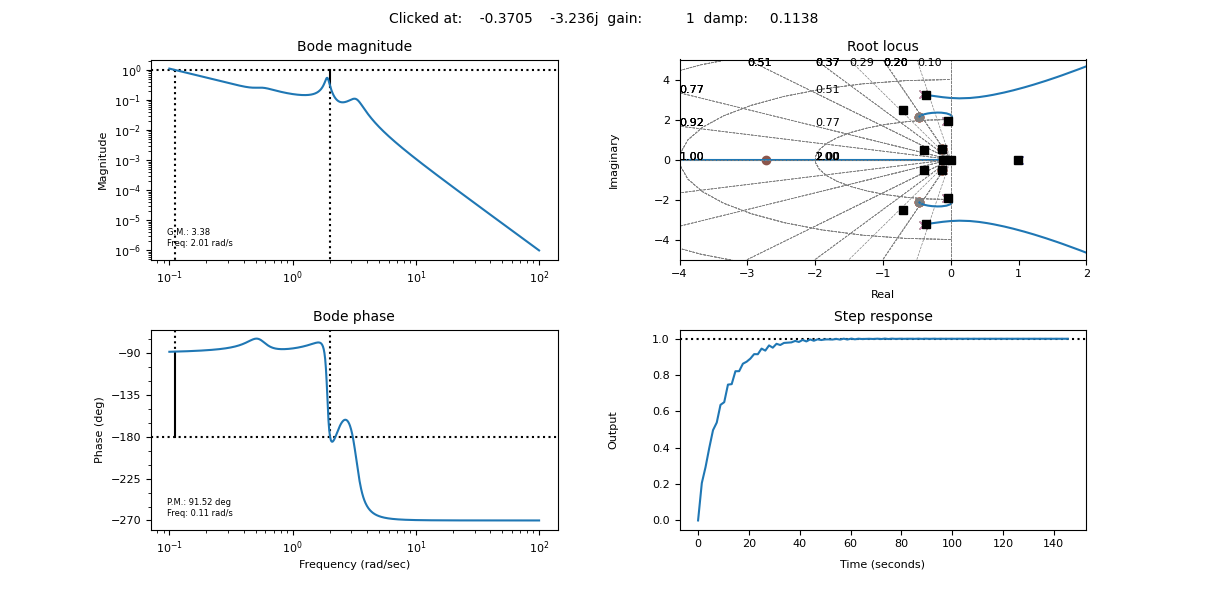

In [123]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-4, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool

plt.draw()  # desenhar a janela interativa

plt.show()

A partir da análise do lugar das raízes para $L_1(s)$, chega-se a $K_i = 1 \ \text{s}^{-1}$ como escolha razoável para o ganho integral.

Assim pode-se calcular $T_i$ pela expressão:
$$T_i = \frac{K_p}{K_i}$$

In [122]:
K_i = 2.164
T_i = K_p/K_i
T_i

4.1589648798521255

Assumindo os valor calculados para $T_i$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PI}}(s) = K_c \left(1 + \frac{1}{T_i s}\right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s)N(s)}{s T_i D(s)}}_{\displaystyle L_2(s)} = 0
\end{align*}


In [125]:
L_2 = (1 + T_i * s) * N/(s * T_i * D)
L_2

TransferFunction(array([ 4.15896488,  5.9255824 , 23.40745971, 11.660231  ,  7.09727039,
        1.34130257]), array([  4.15896488,   4.99075786,  25.24491682,  -9.58225508,
       -13.31950092, -11.49288355,   0.        ,   0.        ]))

Lugar das raízes de $L_2(s)$ e ajuste fino de $K_c$

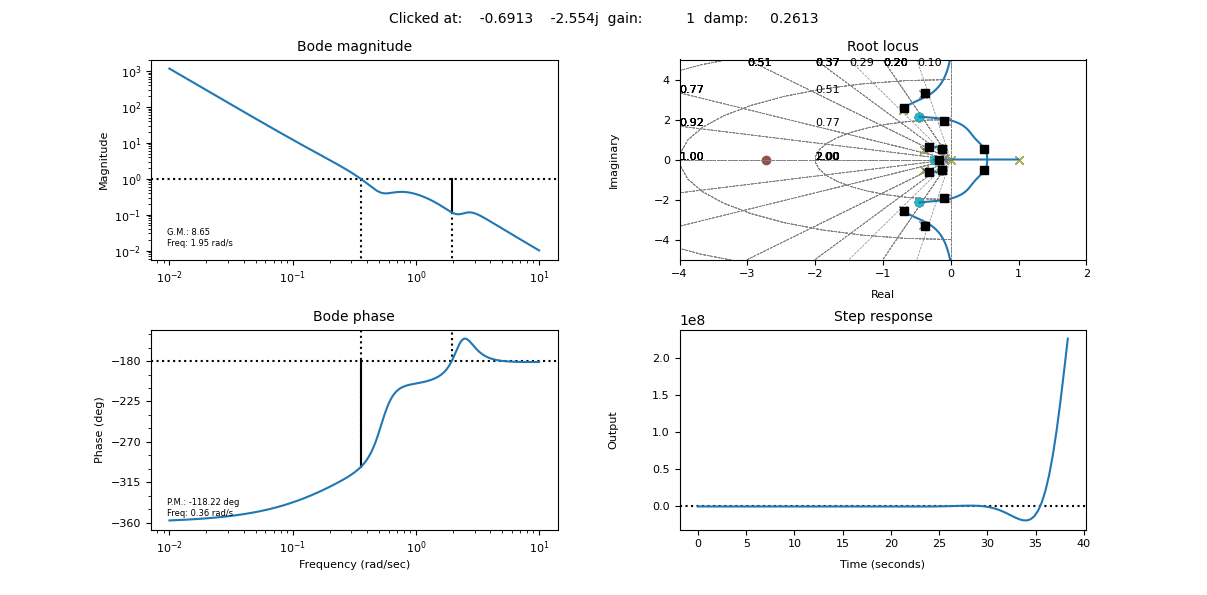

In [126]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-4, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()


Obtém-se assim $K_c = 9$, o que leva o seguinte compensador PI:

In [127]:
K_c_PI = 9
G_c_PI = K_c_PI * (1 + 1/(T_i * s))
G_c_PI

TransferFunction(array([37.43068392,  9.        ]), array([4.15896488, 0.        ]))

Diagrama de Bode do compensador PID sintetizado

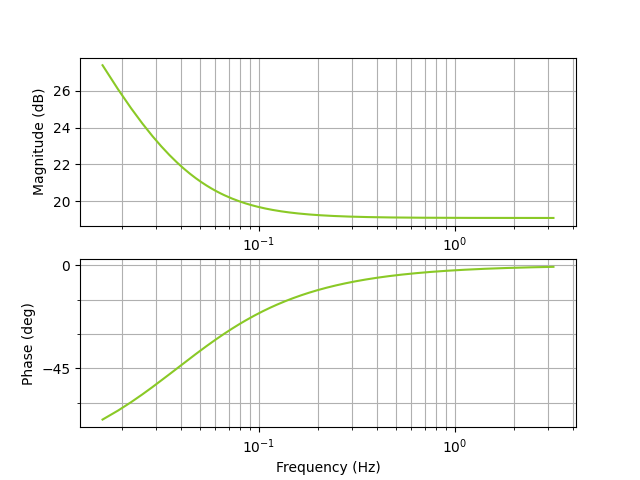

In [128]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PI,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['green'],
                                   dB=True, Hz=True)

#### 3.3. Síntese de um compensador PID

Podemos agora trocar o controlador *proporcional-integral* (PI) por um *proporcional-integral-derivativo* (PID), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PID}}(s) = \left( K_p + \frac{K_i}{s} + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + K_i \frac{N(s)}{s D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & s D(s) + (K_p s + K_i)N(s) + K_d s^2 N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s^2 N(s)}{s D(s) + (K_p s + K_i)N(s)}}_{\displaystyle L_3(s)} = 0
\end{align*}

In [129]:
L_3 = (s * s * N)/(s * D + (K_p * s + K_i) * N)


L_3

TransferFunction(array([1.        , 1.18432892, 5.34342833, 1.51884011, 1.34130257,
       0.        , 0.        ]), array([ 1.        ,  1.2       , 15.07      , 10.51896032, 47.45114281,
       22.46933988, 15.35849313,  2.90257876]))

Lugar das raízes de $L_3(s)$ e ajuste de $K_d$

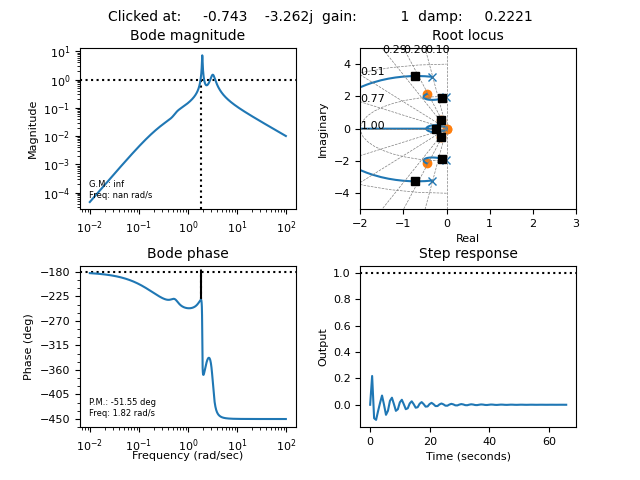

Clicked at    -0.2003    +1.804j gain      2.083 damp     0.1103
Clicked at    -0.4248    +1.824j gain        4.6 damp     0.2268
Clicked at    -0.5177    +1.924j gain      6.786 damp     0.2598
Clicked at    -0.4983    +2.144j gain      24.24 damp     0.2264
Clicked at     -0.481    +2.129j gain      45.19 damp     0.2204
Clicked at    -0.4695     +2.14j gain      108.5 damp     0.2143
Clicked at    -0.4747    +2.126j gain      47.08 damp      0.218
Clicked at    -0.4698    +2.126j gain      49.25 damp     0.2158
Clicked at    -0.4672     +2.14j gain      129.3 damp     0.2132
Clicked at    -0.4648    +2.144j gain        241 damp     0.2119
Clicked at    -0.4729    +2.126j gain      48.22 damp     0.2172
Clicked at    -0.4823    +2.118j gain      34.34 damp      0.222
Clicked at    -0.4925      +2.1j gain      22.35 damp     0.2284
Clicked at   -0.05416   +0.5231j gain      3.502 damp      0.103
Clicked at   -0.08009   +0.5231j gain      5.176 damp     0.1513
Clicked at    -0.1031   +

In [130]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_3,  ylim_rlocus=(-5, 5),xlim_rlocus=(-2, 3),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

A partir da análise do lugar das raízes para $L_3(s)$, chega-se a $K_d = 110 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [131]:
K_d = 22

T_d = K_d/K_p
T_d

2.4444444444444446

Finalmente, assumindo os valores calculados para $T_i$ e $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PID}}(s) = K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s + T_d T_i s^2)N(s)}{s T_i D(s)}}_{\displaystyle L_4(s)} = 0
\end{align*}


In [132]:
L_4 = ((1 + T_i * s + T_d * T_i * s * s) * N)/(s * T_i * D)
L_4

TransferFunction(array([10.1663586 , 16.19927742, 60.24879098, 38.84853288, 25.29639392,
        7.09727039,  1.34130257]), array([  4.15896488,   4.99075786,  25.24491682,  -9.58225508,
       -13.31950092, -11.49288355,   0.        ,   0.        ]))

Lugar das raízes de $L_4(s)$ e ajuste fino de $K_c$

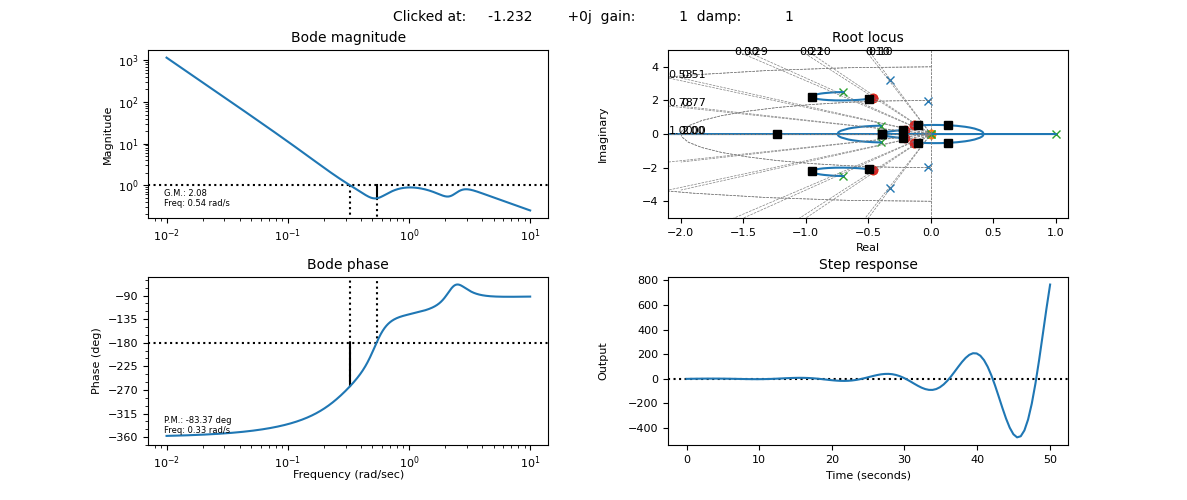

In [133]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_4, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

Assim, adotando $K_c = 15$, tem-se o seguinte compensador PID:

In [134]:
K_c_PID = 11
N_d = 1000

G_c_PID = K_c_PID * (1 + 1/(T_i * s) + (T_d * s)/(1 + T_d * s/N_d))
G_c_PID

TransferFunction(array([111941.77449168,  45775.50256726,  11000.        ]), array([  10.1663586 , 4158.96487985,    0.        ]))

Diagrama de Bode do compensador PID sintetizado

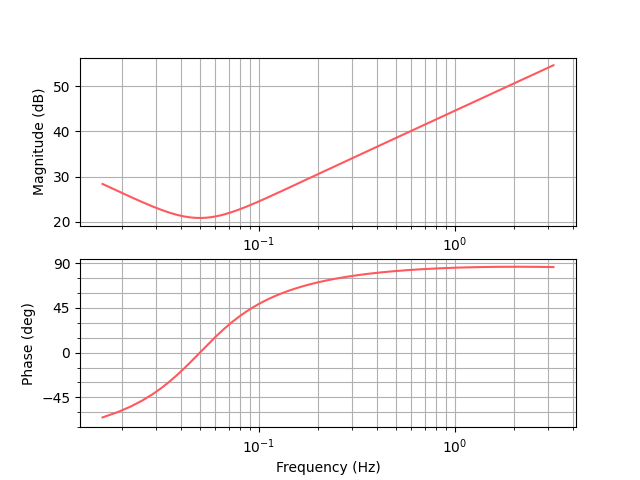

In [135]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PID,
                                omega=np.linspace(0.1, 20, 1001),
                                color=cp['red'],
                                dB=True, Hz=True)

#### 3.4. Síntese de um compensador PD

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-derivativo* (PD), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PD}}(s) = \left( K_p + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & D(s) + K_p N(s) + K_d s N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s N(s)}{D(s) + K_p N(s)}}_{\displaystyle L_5(s)} = 0
\end{align*}

In [136]:
L_5 = (s * N)/(D + K_p * N)
L_5

TransferFunction(array([1.        , 1.18432892, 5.34342833, 1.51884011, 1.34130257,
       0.        ]), array([ 1.        ,  1.2       , 15.07      ,  8.35496032, 44.88825501,
       10.90616096, 12.07172314]))

Lugar das raízes de $L_5(s)$ e ajuste de $K_d$

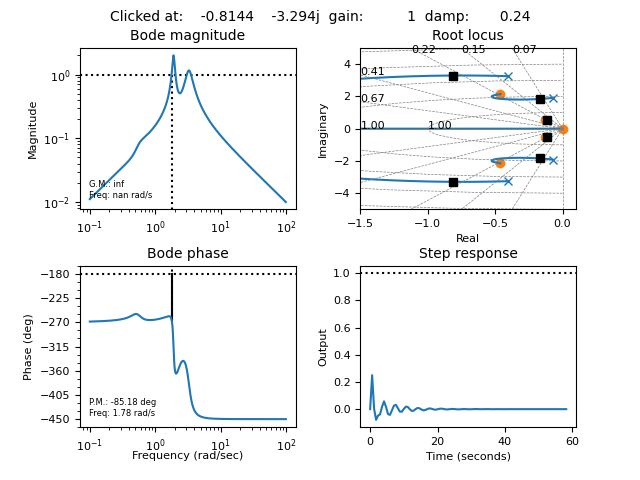

Clicked at    -0.4119    +1.839j gain       3.97 damp     0.2185
Clicked at    -0.5306    +1.963j gain      7.352 damp     0.2609
Clicked at   -0.07004   +0.5665j gain      3.903 damp     0.1227
Clicked at   -0.07004   +0.5665j gain      3.903 damp     0.1227
Clicked at   -0.06695   +0.5665j gain      3.817 damp     0.1174
Clicked at   -0.06695   +0.5665j gain      3.817 damp     0.1174
Clicked at    -0.1093   +0.5289j gain      8.665 damp     0.2023
Clicked at    -0.1093   +0.5289j gain      9.884 damp     0.2023
Clicked at    -0.1093   +0.5289j gain      9.884 damp     0.2023
Clicked at    -0.1093   +0.5289j gain      8.665 damp     0.2023
Clicked at    -0.1093   +0.5289j gain      9.884 damp     0.2023
Clicked at    -0.1093   +0.5289j gain      9.884 damp     0.2023


In [137]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_5, xlim_rlocus=(-1.5, 0.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_5(s)$, chega-se a $K_d = 4 \ \text{s}$ como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [138]:
K_d = 8
T_d = K_d/K_p
T_d

0.8888888888888888

Finalmente, assumindo os valor calculado para $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PD}}(s) = K_c \left(1 + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 +  K_c \underbrace{\frac{\left(1 + T_d s \right) N(s)}{D(s)}}_{\displaystyle L_6(s)} = 0
\end{align*}

In [139]:
L_6 = ((1 + T_d * s) * N)/D
L_6

TransferFunction(array([0.88888889, 2.05273682, 5.934043  , 6.69350843, 2.71110906,
       1.34130257]), array([ 1.    ,  1.2   ,  6.07  , -2.304 , -3.2026, -2.7634,  0.    ]))

Lugar das raízes de $L_6(s)$ e ajuste fino de $K_c$

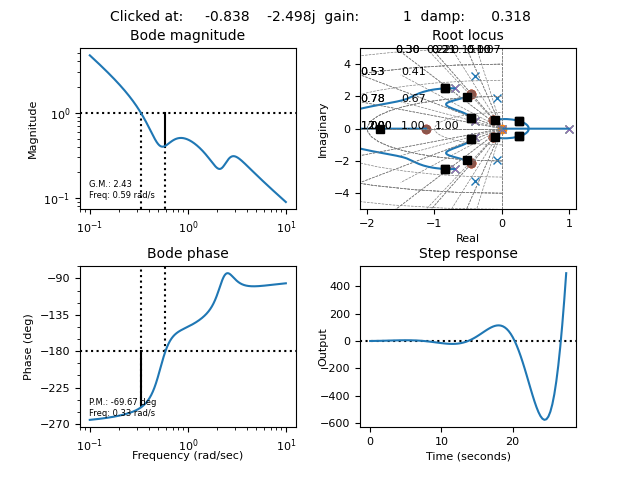

In [141]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_6, xlim_rlocus=(-2.1, 1.1), ylim_rlocus=(-5, 5),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa
plt.show()

Assim, adotando $K_c = 30, tem-se o seguinte compensador PD:


In [142]:
K_c_PD = 10
N_d = 1000

G_c_PD = K_c_PD * (1 + (T_d * s)/(1 + T_d * s/N_d))
G_c_PD

TransferFunction(array([ 8897.77777778, 10000.        ]), array([8.88888889e-01, 1.00000000e+03]))

Diagrama de Bode do compensador PD sintetizado

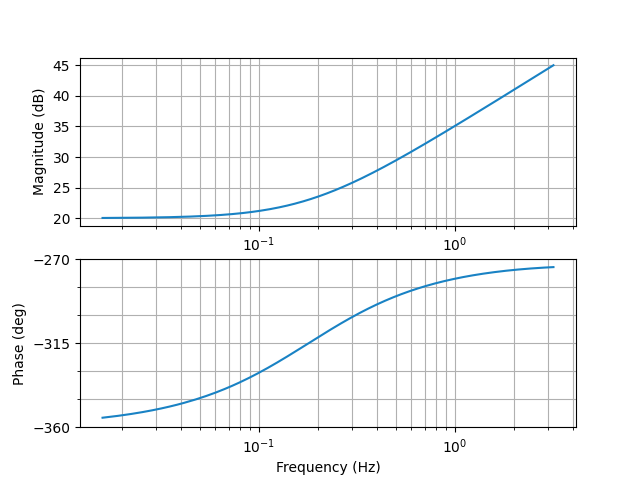

In [143]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PD,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['blue'],
                                   dB=True, Hz=True)

### 4. Análise das respostas em malha fechada com compensadores PI, PD e PID

#### 4.1. Função de transferência entre referência (r) e saída (c)

In [144]:
rc_tf_PI = ct.feedback(G_c_PI * L_0)
rc_tf_PD = ct.feedback(G_c_PD * L_0)
rc_tf_PID = ct.feedback(G_c_PID * L_0)
rc_tf_PID

TransferFunction(array([ 4169025.11903882,  6642304.92383742, 24705611.04096935,
       15926786.30327171, 10370301.26417976,  2908887.64343014,
         549492.49729115]), array([3.78623660e+02, 1.55345846e+05, 4.35719316e+06, 7.58162396e+06,
       2.43475285e+07, 1.54296845e+07, 9.94227410e+06, 2.90888764e+06,
       5.49492497e+05]))

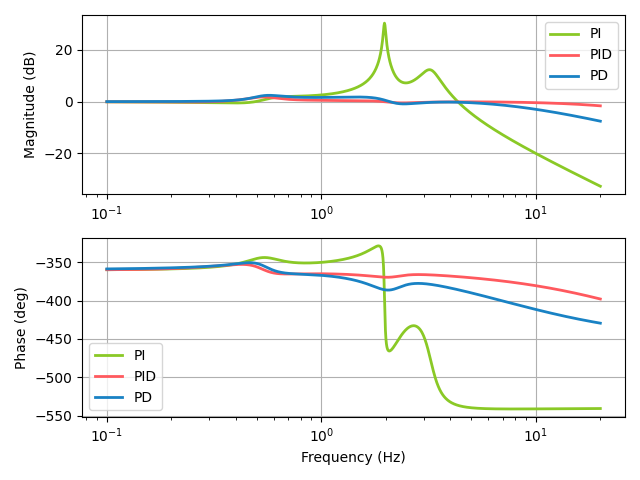

In [145]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.2. Função de transferência entre referência (r) e entrada de controle (u)

In [146]:
ru_tf_PI = ct.feedback(G_c_PI, L_0)
ru_tf_PD = ct.feedback(G_c_PD, L_0)
ru_tf_PID = ct.feedback(G_c_PID, L_0)
ru_tf_PID

TransferFunction(array([  4169025.11903882,   6707638.02985849,  27761422.73697989,
         1234354.95989772, -14792895.46190647, -17924383.27609461,
        -6023077.81904845,  -1132084.28871992,         0.        ]), array([3.78623660e+02, 1.55345846e+05, 4.35719316e+06, 7.58162396e+06,
       2.43475285e+07, 1.54296845e+07, 9.94227410e+06, 2.90888764e+06,
       5.49492497e+05]))

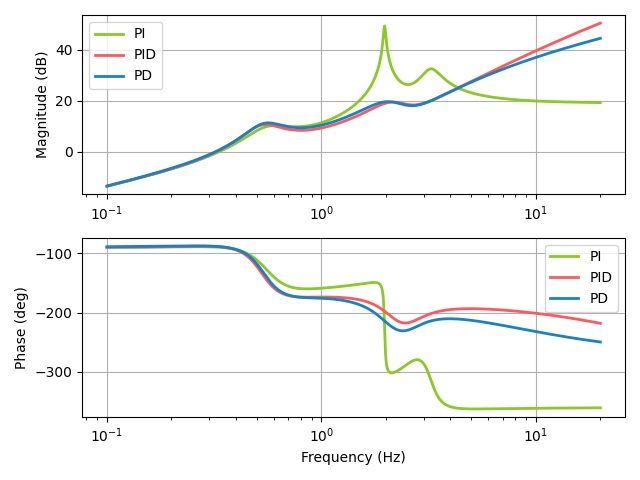

In [147]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    ru_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    ru_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    ru_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.3. Resposta a degrau

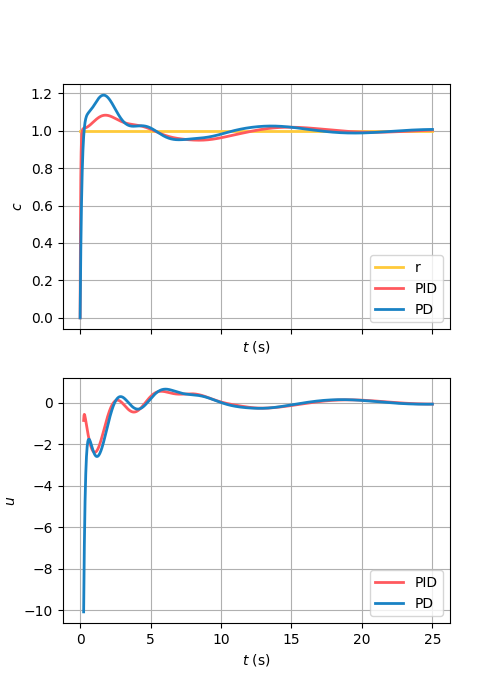

In [148]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

# t, y_PI = ct.step_response(rc_tf_PI, ts)
# t, u_PI = ct.step_response(ru_tf_PI, ts)

t, y_PID = ct.step_response(rc_tf_PID, ts)
t, u_PID = ct.step_response(ru_tf_PID, ts)

t, y_PD = ct.step_response(rc_tf_PD, ts)
t, u_PD = ct.step_response(ru_tf_PD, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'], 
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 4.4. Resposta a rampa

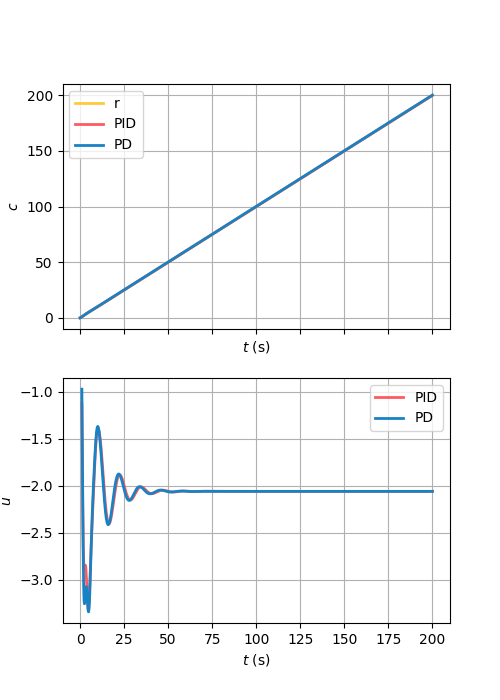

In [149]:
# simulação do sistema em MF
ts = np.linspace(0, 200, 2000)

# t, y_PI = ct.forced_response(rc_tf_PI, ts, U=ts)
# t, u_PI = ct.forced_response(ru_tf_PI, ts, U=ts)

t, y_PID = ct.forced_response(rc_tf_PID, ts, U=ts)
t, u_PID = ct.forced_response(ru_tf_PID, ts, U=ts)

t, y_PD = ct.forced_response(rc_tf_PD, ts, U=ts)
t, u_PD = ct.forced_response(ru_tf_PD, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'],
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()